In [25]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as T
from utilities.dataset import CustomDataset
from utilities.constants import PATH, ROWS, COLS
from utilities.transforms import transforms
from utilities.training import fit

In [26]:
ds = CustomDataset(root_dir=PATH, transforms=transforms)

In [27]:
TRAIN_SIZE = int(0.8 * len(ds))
VALID_SIZE= len(ds) - TRAIN_SIZE

train_ds, test_ds = random_split(ds, [TRAIN_SIZE, VALID_SIZE])

In [28]:
len(train_ds), len(test_ds)

(2588, 647)

In [29]:
train_dl = DataLoader(train_ds, batch_size=64, shuffle = True)
test_dl = DataLoader(test_ds, shuffle = False)

In [30]:
train_image_batch, train_image_label = next(iter(train_dl))

In [31]:
class_names= list(ds.class_to_idx.keys())
class_names

['sandero',
 'chevroulet aveo',
 'mercedes class a',
 'hyundai tucson',
 'picanto',
 'toyota corolla',
 'bmw serie 1',
 'chevrolet spark',
 'duster',
 'polo',
 'megane',
 'octavia',
 'seat ibiza',
 'logan',
 'hyundai i10',
 'clio',
 'nemo citroen',
 'symbol',
 'Golf',
 'volkswagen tiguan']

In [32]:
train_image_batch[2], train_image_label[2], class_names[train_image_label[2]]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor(15),
 'clio')

In [33]:
print(f'Shape of the each image -> {train_image_batch[0].shape}')

Shape of the each image -> torch.Size([3, 224, 224])


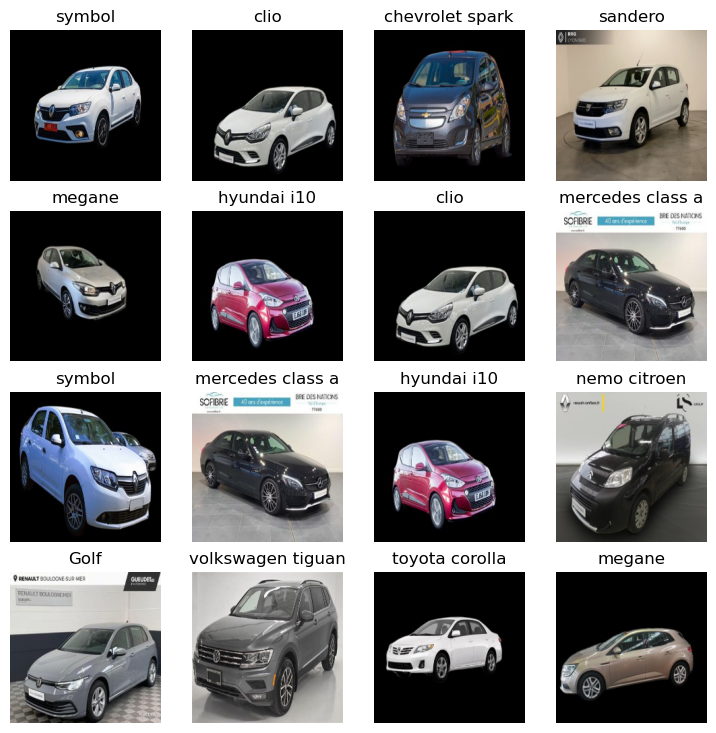

In [34]:
fig = plt.figure(figsize = (9,9))


for i in range(1, ROWS*COLS+1):
    random_idx = torch.randint(0, len(train_image_batch), size = [1]).item()
    img_data, label = train_image_batch[random_idx], train_image_label[random_idx]
    img = np.transpose(img_data.squeeze(), (1,2,0))
    fig.add_subplot(ROWS, COLS, i)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('Off')